In [50]:
using Plots

## 1.
Dado un $s \in \mathbb{R}^+$, demuestra que la sucesión del método de Herón, definida por la sucesión recursiva:
$$x_{k} =  \frac{1}{2} \left( x_{k-1} +  \frac{s}{x_{k-1}} \right)$$

Es la misma sucesión que la obtenida al aplicarle el método de Newton a la función $f = x^2 - s$


In [51]:
function miHeron(n,s)
    #creo el arreglo elemento a elemento, la sucesión recursiva es para valores K mayores o iguales a uno, considerando esto mi primer elemento será 1, agrego el punto para cusar flotantes
   element=[1.0]
    # creamos todos los subsecuentes
    for k in 2:n
        push!(element,(0.5)*(element[k-1]+(s/(element[k-1]))))
    end
    # regreso el arreglo
    return element
end

miHeron (generic function with 1 method)

Tenemos que la sucesión converge a $\sqrt s $.

Veamos que sucede con el metódo de Newton para la siguiente función:

In [52]:
#supongamos s=5 para ambos casos
function f1(x)
    return (x^2)-5
end

f1 (generic function with 1 method)

In [53]:
function difCentrada(f,a,h)  
    return (f(a+h)-f(a-h))/(2*h)
end

difCentrada (generic function with 1 method)

In [54]:
function miNewtonDif(f,x_inicial,n)
    termino=[x_inicial]
    for k in 2:n
        push!(termino, termino[k-1]-(f(termino[k-1])/difCentrada(f,termino[k-1],1*10^(-6))))
        end 
    return termino 
end

miNewtonDif (generic function with 1 method)

In [55]:
#n=20, s=5
miHeron(20,5)

20-element Array{Float64,1}:
 1.0
 3.0
 2.3333333333333335
 2.238095238095238
 2.2360688956433634
 2.236067977499978
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979

In [56]:
# en f1 fijamos s=5, iniciamos en x_inicial=1 usando n=20
miNewtonDif(f1,1.0,20)

20-element Array{Float64,1}:
 1.0
 2.99999999994249
 2.3333333333278317
 2.23809523810855
 2.2360688956435033
 2.2360679774999785
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979
 2.23606797749979

viendo los terminos notamos que tambien converge a  $\sqrt s $ y es la misma sucesión que la obtenida al aplicarle el método de Newton a la función $f = x^2 - s$

## 2. Ejercicio 3. Clase 8.2
Utiliza la función `miTriseccion(f,a,b,epsilon)` para encontrar el mínimo global de las siguientes funciones:

1. $f_1(x) = x^2-5x + 8 $

2. $f_2(x) = 1-e^{-(x+2)^2}$

3. $f_3(x) = \frac{-1}{(1+(x+1)^2)}$

Resuelve analíticamente para encontrar la solución exacta y analiza el error absoluto como función de `epsilon`. Para eso, toma como solución dada por el algoritmo el punto medio del intervalo resultante.

**Sugerencia**: primero grafica las funciones para que encuentren un intervalo $[a,b]$  que contenga al mínimo.

In [57]:
function f_1(x)
    return x^2-5*x+8
end

f_1 (generic function with 1 method)

In [58]:
function f_2(x)
    return 1-exp(big(1))^(-(x+2)^2)
end

f_2 (generic function with 1 method)

In [59]:
function f_3(x)
    return (-1)/(1+(x+1)^2) 
end

f_3 (generic function with 1 method)

Graficando las funciones para encontrar el intervalo $[a,b]$ donde se encuentra el mínimo 

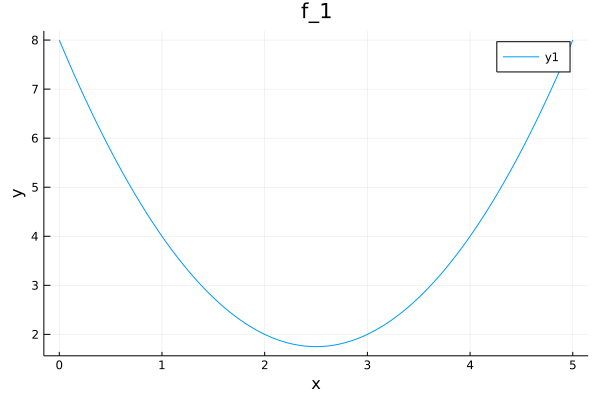

In [60]:
xs=range(0,stop=5, length=100)
ys=[f_1(x) for x in xs]
plot(xs,ys, xlabel="x", ylabel="y", title="f_1")

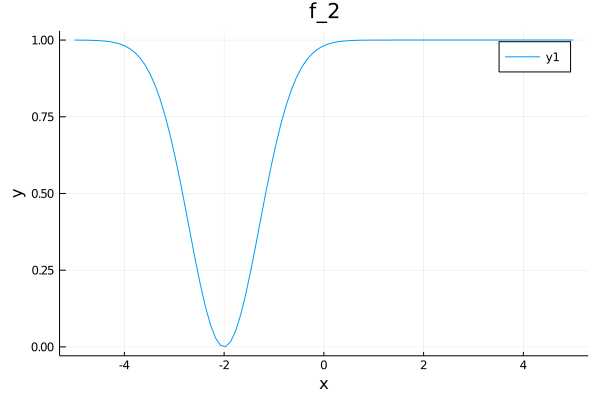

In [61]:
xs=range(-5,stop=5, length=100)
ys=[f_2(x) for x in xs]
plot(xs,ys, xlabel="x", ylabel="y", title="f_2")

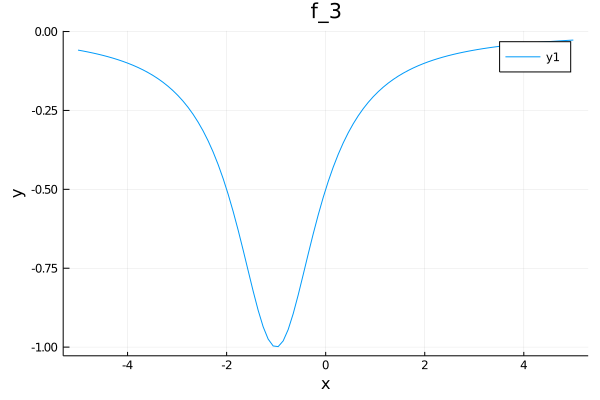

In [62]:
xs=range(-5,stop=5, length=100)
ys=[f_3(x) for x in xs]
plot(xs,ys, xlabel="x", ylabel="y", title="f_3")

Utilicemos la funcion mi trisección para encontrar el minimo global de las funciones dadas: 

In [63]:
function miTriseccion(f,a,b,epsilon)
    intMin = a
    intMax = b
    longInt=abs(intMax-intMin) 
    while longInt>=epsilon
         c1=(2*intMin+intMax)/3
         c2=(intMin+2*intMax)/3
        if f(c1)<f(c2)
            intMax=c2
         else 
            intMin=c1
        end
    longInt=abs(intMax-intMin)    
    end
    return intMin,intMax
end

miTriseccion (generic function with 1 method)

obtengamos el punto medio de cada intervalo para usarlo despues.

In [64]:
function puntomedio(k)
    return (k[1]+k[2])/2
end

puntomedio (generic function with 1 method)

In [65]:
k_1=miTriseccion(f_1,2.0,3.0,1*10^(-6))
print("Intervalo: ")
println(k_1)
print("Minimo global: ")
pm1=puntomedio(k_1)
print(pm1)

Intervalo: (2.4999995632771834, 2.500000250038671)
Minimo global: 2.4999999066579273

In [66]:
k_2=miTriseccion(f_2,-3.0,-1.0,1*10^(-6))
print("Intervalo: ")
println(k_2)
print("Minimo global: ")
pm2=puntomedio(k_2)
print(pm2)

Intervalo: (-2.0000005000773435, -1.9999995843953593)
Minimo global: -2.0000000422363513

In [67]:
k_3=miTriseccion(f_3,-1.5,-0.5,1*10^(-6))
print("Intervalo: ")
println(k_3)
print("Minimo global: ")
pm3=puntomedio(k_3)
print(pm3)

Intervalo: (-1.0000002500386718, -0.9999995632771835)
Minimo global: -0.9999999066579277

In [68]:
k_11=miTriseccion(f_1,2.0,3.0,0.0001)
print("Intervalo: ")
println(k_11)
print("Minimo global: ")
pm11=puntomedio(k_11)
print(pm11)

Intervalo: (2.4999477679470643, 2.50003687273516)
Minimo global: 2.499992320341112

In [69]:
k_22=miTriseccion(f_2,-3.0,-1.0,0.0001)
print("Intervalo: ")
println(k_22)
print("Minimo global: ")
pm22=puntomedio(k_22)
print(pm22)

Intervalo: (-2.000034143342278, -1.9999549390861933)
Minimo global: -1.9999945412142357

In [70]:
k_33=miTriseccion(f_3,-1.5,-0.5,0.0001)
print("Intervalo: ")
println(k_33)
print("Minimo global: ")
pm33=puntomedio(k_33)
print(pm33)

Intervalo: (-1.00003687273516, -0.9999477679470647)
Minimo global: -0.9999923203411124

In [71]:
k_111=miTriseccion(f_1,2.0,3.0,0.1)
print("Intervalo: ")
println(k_111)
print("Minimo global: ")
pm111=puntomedio(k_111)
print(pm111)

Intervalo: (2.4362139917695473, 2.52400548696845)
Minimo global: 2.4801097393689986

In [72]:
k_222=miTriseccion(f_2,-3.0,-1.0,0.1)
print("Intervalo: ")
println(k_222)
print("Minimo global: ")
pm222=puntomedio(k_222)
print(pm222)

Intervalo: (-2.0480109739369, -1.9699740893156534)
Minimo global: -2.008992531626277

In [73]:
k_333=miTriseccion(f_3,-1.5,-0.5,0.1)
print("Intervalo: ")
println(k_333)
print("Minimo global: ")
pm333=puntomedio(k_333)
print(pm333)

Intervalo: (-1.02400548696845, -0.9362139917695474)
Minimo global: -0.9801097393689988

Resolviendo analiticamente, obtenemos:
$$min{f_1}=5/2$$
$$min{f_2}=-2$$
$$min{f_3}=-1$$

Analicemos el error absoluto como funcion de epsilon:

In [74]:
#con epsilon=1*10^(-6)
println(abs((5/2)-pm1))
println(abs(-2-pm2))
println(abs(-1-pm3))

9.334207273781203e-8
4.2236351305291464e-8
9.334207229372282e-8


In [75]:
#con epsilon=0.0001
println(abs((5/2)-pm11))
println(abs(-2-pm22))
println(abs(-1-pm33))

7.679658887926877e-6
5.4587857643007e-6
7.67965888759381e-6


In [76]:
#con epsilon=0.1
println(abs((5/2)-pm111))
println(abs(-2-pm222))
println(abs(-1-pm333))

0.01989026063100141
0.00899253162627689
0.01989026063100119


Podemos ver que conforme el valor de epsilon aumenta el valor del erro absoluto tambien aumenta. 

## 3.  
Definimos $f: [0,1.1] \to \mathbb{R}$ de la siguiente forma

$$
f(x) = -(1.4-3x)\sin{(18x)}
$$

Usa el algoritmo de descenso de gradiente para encontrar mínimos locales de la función dentro del intervalo señalado como su dominio. ¿Los mínimos encontrados dependen de la condición inicial?. Utiliza ahora el método de la trisección para encontrar los mínimos. ¿Qué método requiere menos pasos?

**Sugerencia:** Primero grafica la función $f(x)$ para darte una idea de los mínimos de la función.

In [77]:
#considero el intervalo [0,1.1]
function f(x)
    return -((1.4)-3*x)*sin(18*x)
end

f (generic function with 1 method)

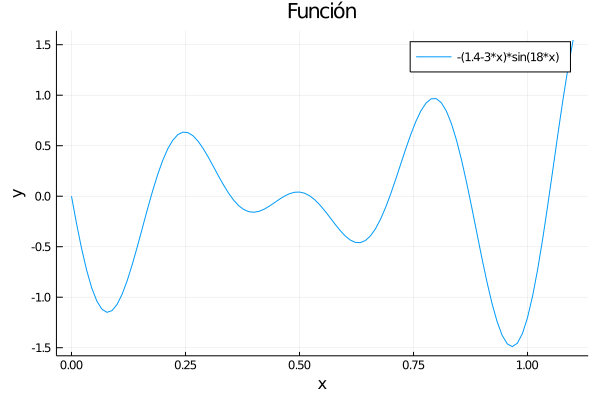

In [78]:
xs=range(0,stop=1.1,length=100)
ys=[f(x) for x in xs]
plot(xs,ys,title="Función", label="-(1.4-3*x)*sin(18*x)", xlabel="x", ylabel="y")

In [79]:
function difCentrada(f,a,h)  
    return (f(a+h)-f(a-h))/(2*h)
end

difCentrada (generic function with 1 method)

In [80]:
function miDesGrad(f,x_inicial,alpha,n)
    termino=[x_inicial]
    for k in 2:n
        push!(termino, termino[k-1]-alpha*difCentrada(f,termino[k-1],1*10^(-6)))
        end 
    return termino 
end

miDesGrad (generic function with 1 method)

In [81]:
miDesGrad(f,0.1,0.0001,1000)

1000-element Array{Float64,1}:
 0.1
 0.0992579855633168
 0.09854002181051139
 0.09784555067030568
 0.09717400721284122
 0.09652482187264547
 0.09589742248468083
 0.09529123614065985
 0.09470569087330896
 0.09414021717708546
 0.09359424937415142
 0.09306722683445337
 0.09255859505898903
 ⋮
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204
 0.07935168932530204

In [82]:
miDesGrad(f,0.28,0.0001,1000)

1000-element Array{Float64,1}:
 0.28
 0.28060840041808954
 0.28122506752841536
 0.28184996892164116
 0.28248306515492905
 0.2831243095835465
 0.2837736482022599
 0.2844310194978137
 0.2850963543132887
 0.28576957572556994
 0.28645059893681357
 0.28713933118110524
 0.28783567164698853
 ⋮
 0.3983865015290505
 0.3983865115253612
 0.39838652140208286
 0.39838653116063655
 0.3983865408024253
 0.39838655032886605
 0.3983865597413299
 0.39838656904117
 0.3983865782297546
 0.39838658730840354
 0.39838659627843104
 0.3983866051411402

In [83]:
miTriseccion(f,0.0,0.25,1*10^(-6))

(0.07935136032020945, 0.07935222950271793)

En el método de trisección el encontrar un minimo dependerá del subintervalo $[a,b]$ que tomemos dentro del intervalo $[0,1.1]$ 
en el método de trisección recordemos que se tiene un vector director, que es el que nos indica en qué direccion correra el programa, por eso el $x_inicial$ es importante al momento de elegir.
El método que requiere menos pasos es el de la trisección, ya que solo hay que elegir subintervalos y el programa te arrojará el minimo en ese subintervalo, a diferencia del de gradiente, que va punto por punto y se aproxima de una manera muy lenta al minimo.

## 4. Ejercicio 12. Clase 09
Definimos la función de Runge como

$$
R(x) = \frac{1}{1+x^2}
$$

Toma una partición regular (puntos uniformemente espaciados) del intervalo $[-1,1]$ con $N$ puntos y utilizalos para generar los pares $(x_i,y_i)$. Haz la interpolación polinomial de la función y gráficala junto la función de Runge . ¿Qué observas? Hazlo para varios valores de $N$.

Hacemos las siguientes cuentitas:
$$gi(x)=(x-x1)(x-x2)...(x-x(i-1))(x-x(i+1))...(x-xN)(x-a)$$
consideramos $gi(xi)=1$, entonces podemos proceder de la siguiente forma: 
$$1=(xi-x1)(xi-x2)...(xi-x(i-1))(xi-x(i+1))...(xi-xN)(xi-a)$$
$$xi-a=1/(xi-x1)(xi-x2)...(xi-x(i-1))(xi-x(i+1))...(xi-xN)$$
$$-a=1/((xi-x1)(xi-x2)...(xi-x(i-1))(xi-x(i+1))...(xi-xN))-xi$$
$$a=xi-1/((xi-x1)(xi-x2)...(xi-x(i-1))(xi-x(i+1))...(xi-xN))$$

In [84]:
function auxiliar(xs,i,x)
    a1=1
    for j in 1:length(xs)
        if j==i
            a1=a1*1
        else
            a1=a1*(xs[i]-xs[j])
        end
    end
    return a1
end

auxiliar (generic function with 1 method)

In [85]:
function basePolinomial(xs,i,x)
    a=(xs[i])-(1/auxiliar(xs,i,x))
    b=1
    for k in 1:length(xs)
        if k==i
            b=b*(x-a)
        else
            b=b*(x-xs[k])
        end
    end
    return b
end

basePolinomial (generic function with 1 method)

In [86]:
function interpolPoli(xs,ys)
    if !(length(xs)==length(ys))
        print("intentar con otro")
    else
        function g(x)
            suma=0
            for i in 1:length(xs)
                suma=suma+ys[i]*basePolinomial(xs,i,x)
            end
            return suma
            println(suma)
        end            
        return g
    end     
end

interpolPoli (generic function with 1 method)

In [87]:
function PartRegular(n)
    arr=[-1.0]
    for i in 1:n-1
        push!(arr,arr[end]+2/(n-1))
    end
    return arr
end

PartRegular (generic function with 1 method)

In [88]:
PartRegular(10)

10-element Array{Float64,1}:
 -1.0
 -0.7777777777777778
 -0.5555555555555556
 -0.33333333333333337
 -0.11111111111111116
  0.11111111111111105
  0.33333333333333326
  0.5555555555555555
  0.7777777777777777
  0.9999999999999999

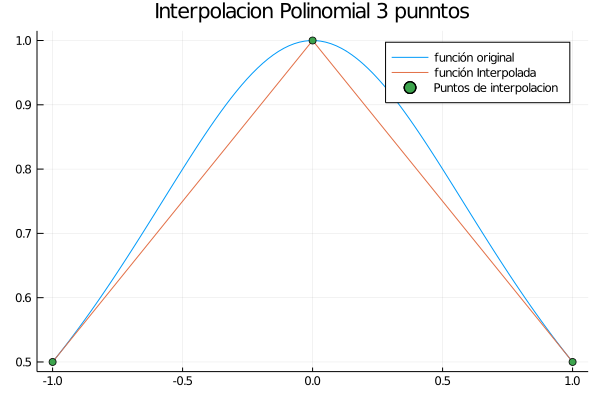

In [89]:
xs=range(-1,stop=1,length=100)
xs1=range(-1,stop=1,length=3)
ys=[1/(1+x^2) for x in xs]
ys1=[interpolPoli(xs,ys)]
plot(xs,ys,label="función original" ,title="Interpolacion Polinomial 3 punntos")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

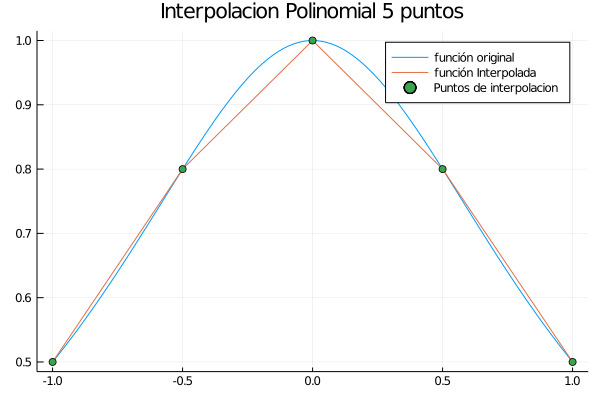

In [90]:
xs=range(-1,stop=1,length=100)
xs1=range(-1,stop=1,length=5)
ys=[1/(1+x^2) for x in xs]
ys1=[interpolPoli(xs,ys)]
plot(xs,ys,label="función original" ,title="Interpolacion Polinomial 5 puntos")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

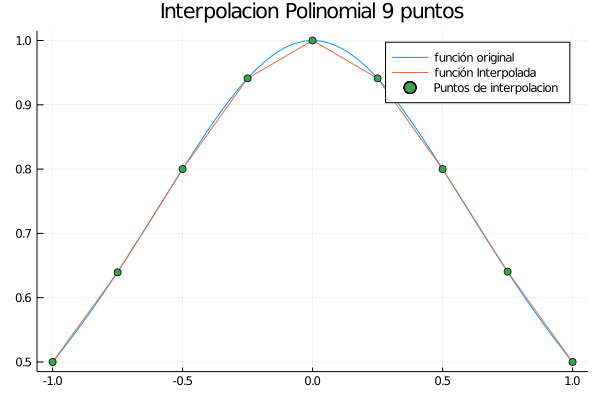

In [91]:
xs=range(-1,stop=1,length=100)
xs1=range(-1,stop=1,length=9)
ys=[1/(1+x^2) for x in xs]
ys1=[interpolPoli(xs,ys)]
plot(xs,ys,label="función original" ,title="Interpolacion Polinomial 9 puntos")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

Aumentando nuestro numero de puntos para la interpolación la gráfica formada por la unión de los puntos se irá hacercando más a la gráfica de nuestra función. 

## 5. 
Interpola, con interpolación lineal y polinomial, las siguientes funciones

* $f_1(x) = |x|$ en el intervalo $[-1,1]$

* $f_2(x) = \sin{\left(\frac{1}{x}\right)}$ en el intervalo $[10^{-3},1]$

Haz una gráfica de las interpolaciones, junto con las funciones originales, para distintos valores de $N$, la cantidad de puntos que usaste para la interpolación. ¿Qué tal ajusta la interpolación? ¿El mejor ajuste se obtiene con la misma cantidad de puntos y/o con el mismo método?.

Para la interpolación lineal: como se hace uso de rectas para unir entre puntos voy a definir una funcion de recta. Recordemos que: $$y-y1=m(x-x1)$$
$$y=m(x-x1)+y1$$
$$m=(y2-y1)/(x2-x1)$$

In [92]:
function RectaPuntos(v1,v2) #v1 y v2 son arreglos, que corresponden a puntos v1=(x1,y1) y v2=(x2,y2)
    if !(length(v1)==2) || !(length(v2)==2) || v1[1]==v2[1]
        print("Intenta con otro arreglo")
    else
        function f(x)
            return ((v2[2]-v1[2])/(v2[1]-v1[1]))*(x-v1[1])+v1[2]
        end
        return f
    end
end

RectaPuntos (generic function with 1 method)

Ahora, por las notas de clase tenemos que para la base lineal tenemos la siguiente expresión $$
f_i(x_j) = \begin{cases}
1 & \text{si } j=i \\
0 & \text{si } j\neq i \\
\end{cases}
$$
usando esto habrá que considerar casos en el programa. 

In [93]:
function baselineal(xs,i,x)
    if i==1
        if x<xs[1]
            return 1
        elseif x>=xs[1] && xs[2]>=x
            return RectaPuntos([xs[1],1],[xs[2],0])(x)
        else
            return 0
        end
    elseif i==length(xs)
        if x<xs[end-1]
            return 0
        elseif x>=xs[end-1] && xs[end]>=x
            return RectaPuntos([xs[end-1],0],[xs[end],1])(x)
        else
            return 1
        end
    else
        if x<xs[i-1]
            return 0
        elseif x>=xs[i-1] && xs[i]>=x
            return RectaPuntos([xs[i-1],0],[xs[i],1])(x)
        elseif x>xs[i] && xs[i+1]>=x
            return RectaPuntos([xs[i+1],0],[xs[i],1])(x)
        else
            return 0
        end
    end
end

baselineal (generic function with 1 method)

In [94]:
function interpolLineal(xs,ys) 
    if !(length(xs)==length(ys))  
        print("intenta con otro")
    else
        function f(x)
            suma=0
            for i in 1:length(xs)
                suma=suma+ys[i]*baselineal(xs,i,x)
            end
            return suma
            println(suma)
        end            
        return f
    end     
end

interpolLineal (generic function with 1 method)

Consideremos las funciones 

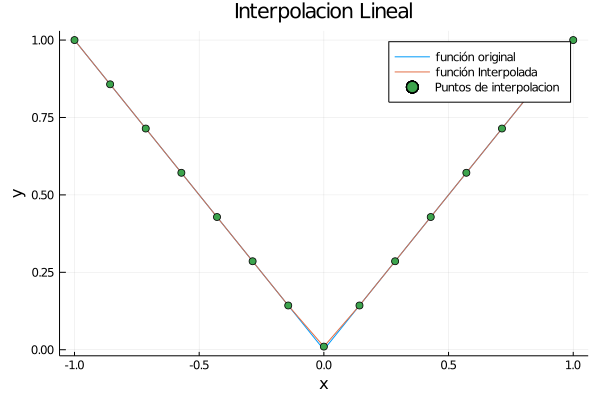

In [95]:
xs=range(-1,stop=1,length=100)
xs1=range(-1,stop=1,length=15)
ys=[abs(x) for x in xs]
ys1=[interpolLineal(xs,ys)]
plot(xs,ys, title="Interpolacion Lineal", label="función original",xlabel="x",ylabel="y")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

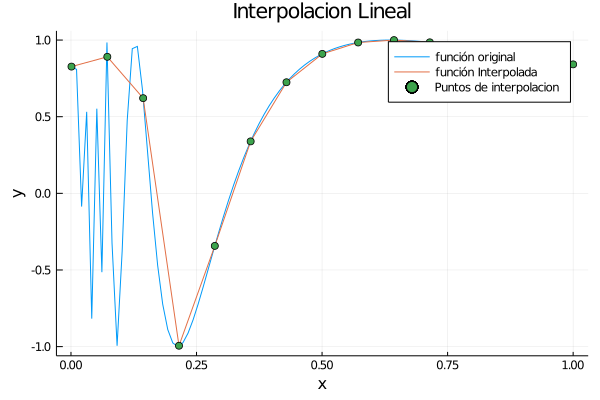

In [96]:
xs=range(1*10^(-3),stop=1,length=100)
xs1=range(1*10^(-3),stop=1,length=15)
ys=[sin(1/x) for x in xs]
ys1=[interpolLineal(xs,ys)]
plot(xs,ys,label="función original", title="Interpolacion Lineal", xlabel="x",ylabel="y")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

Grafiquemos con interpolacion Polinomial

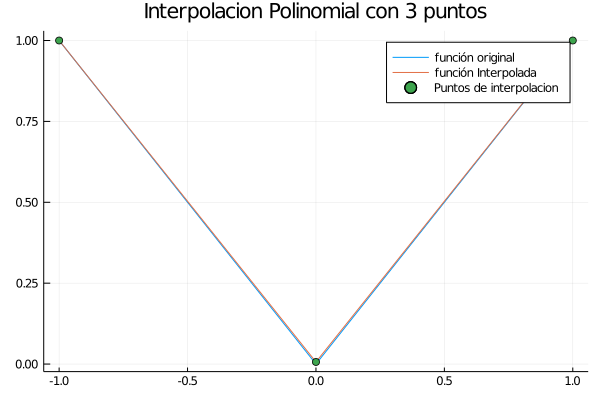

In [100]:
xs=range(-1,stop=1,length=100)
xs1=range(-1,stop=1,length=3)
ys=[abs(x) for x in xs]
ys1=[interpolPoli(xs,ys)]
plot(xs,ys,label="función original" ,title="Interpolacion Polinomial con 3 puntos")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

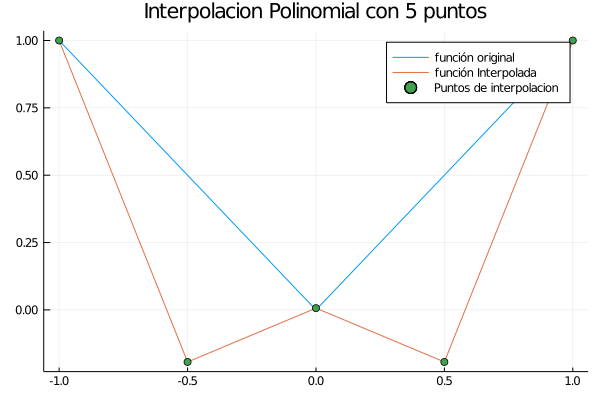

In [101]:
xs=range(-1,stop=1,length=100)
xs1=range(-1,stop=1,length=5)
ys=[abs(x) for x in xs]
ys1=[interpolPoli(xs,ys)]
plot(xs,ys,label="función original" ,title="Interpolacion Polinomial con 5 puntos")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

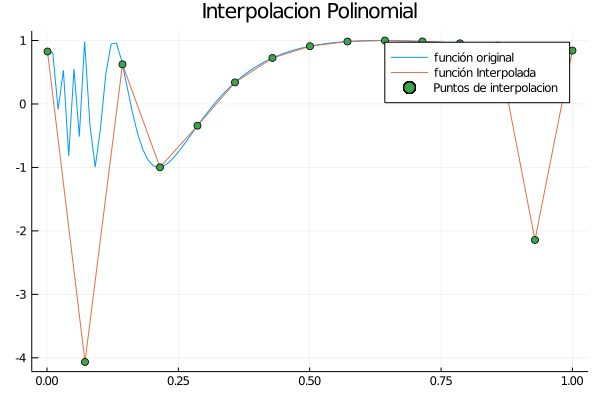

In [102]:
xs=range(1*10^(-3),stop=1,length=100)
xs1=range(1*10^(-3),stop=1,length=15)
ys=[sin(1/x) for x in xs]
ys1=[interpolPoli(xs,ys)]
plot(xs,ys,label="función original" ,title="Interpolacion Polinomial")
plot!(xs1,ys1,label="función Interpolada")
scatter!(xs1,ys1,label="Puntos de interpolacion")

La interpolacion adecuada a usar dependera del tipo de función que estemos manejando, aunque en ocasiones pueden haber regiones en la gráfica en las que la interpolación no sea adecuada. 

## 6. 
Usando las reglas rectangulares (Adelante, Átrás y Centrada) y la regla trapezoidal, realiza el cálculo y el análisis del error para las siguiente integrales:

* $$\int_{0}^1 \frac{\ln{(1+x)}}{1+x^2} \; dx = \frac{\pi \ln{2}}{8}$$
* $$\int_{0}^{\pi/2} \frac{\sqrt{\sin{(x)}}}{\sqrt{\sin{(x)}} + \sqrt{\cos{(x)}}} \; dx = \frac{\pi}{4}$$
* $$\int_{0}^{\pi} \frac{x\sin{(x)}}{1 + \cos^2{x}} \; dx = \frac{\pi^2}{4}$$

In [107]:
function intAdelante(f,a,b,n)
    xs=range(a,stop=b,length=n+1)
    integral=0
    for i in range(1,stop=n)
        integral = integral+f(xs[i+1])
    end
    integral=(b-a)/n*integral
    return integral
end

intAdelante (generic function with 1 method)

In [108]:
function intAtrás(f,a,b,n)
    xs=range(a,stop=b,length=n+1)
    integral=0
    for i in range(1,stop=n)
        integral=integral+f(xs[i])
    end
    integral=(b-a)/n*integral
    return integral
end

intAtrás (generic function with 1 method)

In [109]:
function intCentrada(f,a,b,n)
    xs=range(a,stop=b,length=n+1)
    integral=0
    for i in range(1,stop=n)
        integral=integral+f((xs[i]+xs[i+1])/2)
    end
    integral=(b-a)/n*integral
    return integral
end

intCentrada (generic function with 1 method)

Ahora, para la regla de integración trapezoidal

In [110]:
function AreaTrapecio(x,y,h)
    return (x+y)*h/2
end

AreaTrapecio (generic function with 1 method)

In [111]:
function intTrapezoidal(f,a,b,n)
    xs=range(a,stop=b,length=n+1)
    integral=0
    for i in range(1,stop=n)
        integral=integral+AreaTrapecio(f(xs[i]),f(xs[i+1]),(b-a)/n)
    end
    return integral
end

intTrapezoidal (generic function with 1 method)

In [112]:
function f11(x)
    return (log(1+x))/(1+x^2)
end

f11 (generic function with 1 method)

In [113]:
function f22(x)
    return (sqrt(sin(x)))/(sqrt(sin(x))+sqrt(cos(x)))
end

f22 (generic function with 1 method)

In [114]:
function f33(x)
    return (x*sin(x))/(1+(cos(x)^2))
end

f33 (generic function with 1 method)

In [115]:
#solución de f11
r1=(π*log(2))/8

0.27219826128795027

In [116]:
#solución de f22
r2=π/4

0.7853981633974483

In [117]:
#solución f33
r3=(π^2)/4

2.4674011002723395

Viendo los errores absolutos para cada funcion e integración

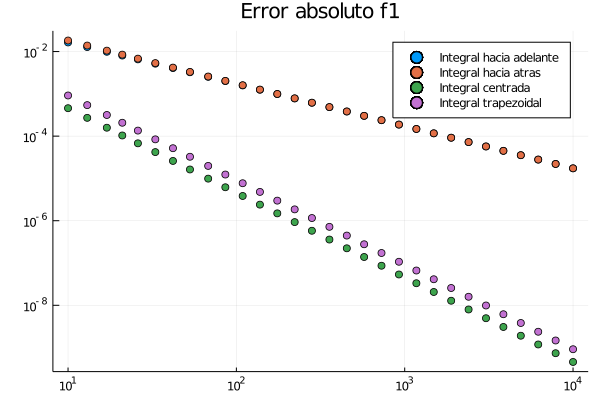

In [126]:
aux = range(1,stop=4,length=30)
ns = [Int64(ceil(10^k)) for k in aux]
ys = [abs(intAdelante(f11,0,1,n)-r1) for n in ns]
ys1 = [abs(intAtrás(f11,0,1,n)-r1) for n in ns]
ys2 = [abs(intCentrada(f11,0,1,n)-r1) for n in ns]
ys3 = [abs(intTrapezoidal(f11,0,1,n)-r1) for n in ns]
scatter(ns,ys,title="Error absoluto f1",label="Integral hacia adelante",xscale=:log10,yscale=:log10)
scatter!(ns,ys1,label="Integral hacia atras",)
scatter!(ns,ys2,label="Integral centrada",)
scatter!(ns,ys3,label="Integral trapezoidal")

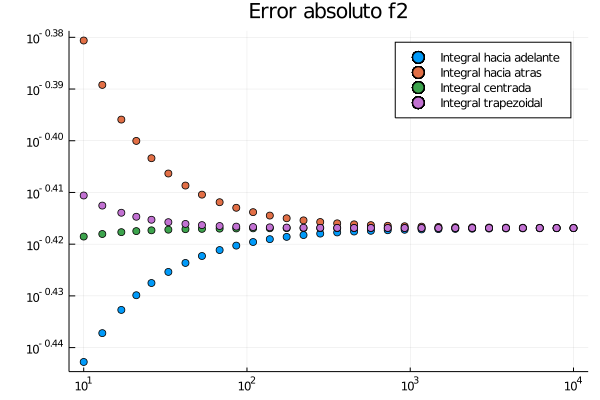

In [127]:
aux = range(1,stop=4,length=30)
ns = [Int64(ceil(10^k)) for k in aux]
ys = [abs(intAdelante(f22,0,1,n)-r2) for n in ns]
ys1 = [abs(intAtrás(f22,0,1,n)-r2) for n in ns]
ys2 = [abs(intCentrada(f22,0,1,n)-r2) for n in ns]
ys3 = [abs(intTrapezoidal(f22,0,1,n)-r2) for n in ns]
scatter(ns,ys,title="Error absoluto f2",label="Integral hacia adelante",xscale=:log10,yscale=:log10)
scatter!(ns,ys1,label="Integral hacia atras")
scatter!(ns,ys2,label="Integral centrada")
scatter!(ns,ys3,label="Integral trapezoidal")

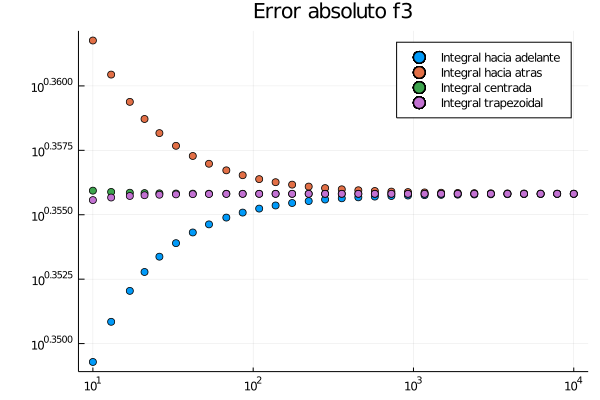

In [128]:
aux = range(1,stop=4,length=30)
ns = [Int64(ceil(10^k)) for k in aux]
ys = [abs(intAdelante(f33,0,1,n)-r3) for n in ns]
ys1 = [abs(intAtrás(f33,0,1,n)-r3) for n in ns]
ys2 = [abs(intCentrada(f33,0,1,n)-r3) for n in ns]
ys3 = [abs(intTrapezoidal(f33,0,1,n)-r3) for n in ns]
scatter(ns,ys,title="Error absoluto f3",label="Integral hacia adelante",xscale=:log10,yscale=:log10)
scatter!(ns,ys1,label="Integral hacia atras")
scatter!(ns,ys2,label="Integral centrada")
scatter!(ns,ys3,label="Integral trapezoidal")